## Plots

In [247]:
# Open the file
data = []
with open('results.txt', 'r') as file:
    # Read each line
    for line in file:
        # Skip lines with '\hline'
        if '\\hline' in line:
            continue
        # Split the line into parts
        parts = line.split(' & ')
        # Extract the values
        algorithm = parts[0].strip()
        configuration = parts[1].strip()
        execution = int(parts[2].strip())
        execution_time = float(parts[3].strip())
        best_distance = int(parts[4].strip().replace("\\\\",""))
        # Add the values to data
        data.append([algorithm, configuration, execution, execution_time, best_distance])


In [248]:
algorithms = [sub_list[0] for sub_list in data]
set_algorithm = set(algorithms)
configurations = [sub_list[1] for sub_list in data]
set_configurations =set(configurations)
executions = [sub_list[2] for sub_list in data]
set_executions = set(executions)
execution_times = [sub_list[3] for sub_list in data]
best_distances = [sub_list[4] for sub_list in data]

print(algorithms)
print(set_algorithm)
print(configurations )
print(set_configurations )
print(executions )
print(set_executions )
print(execution_times )
print(best_distances )


['brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_

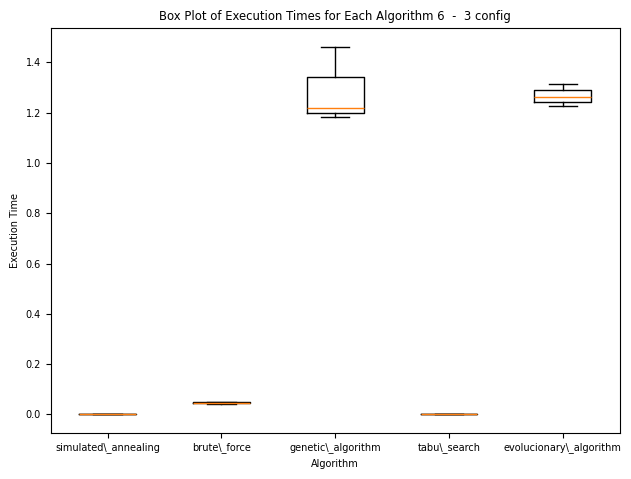

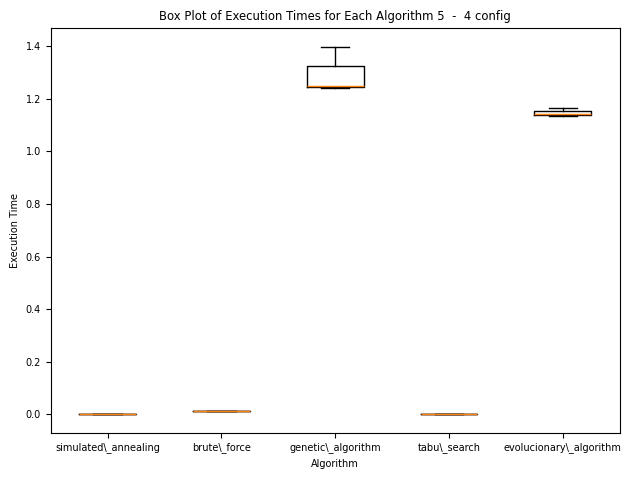

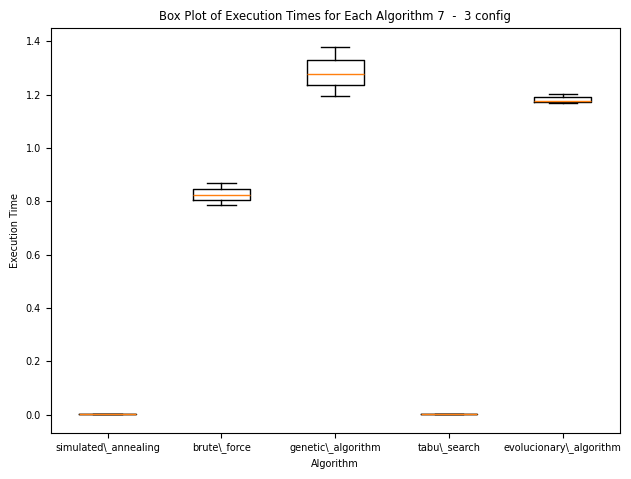

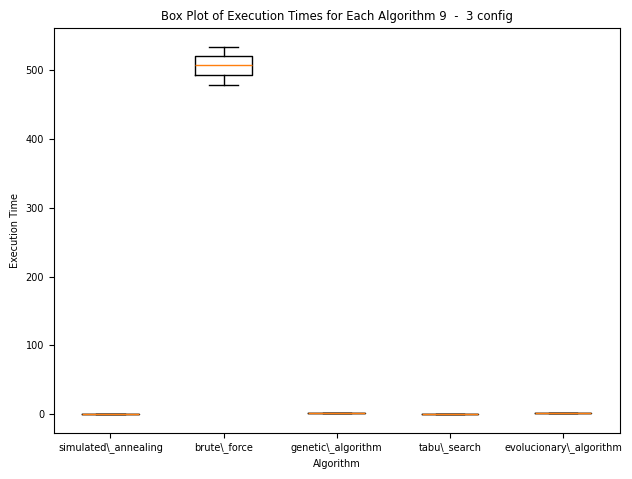

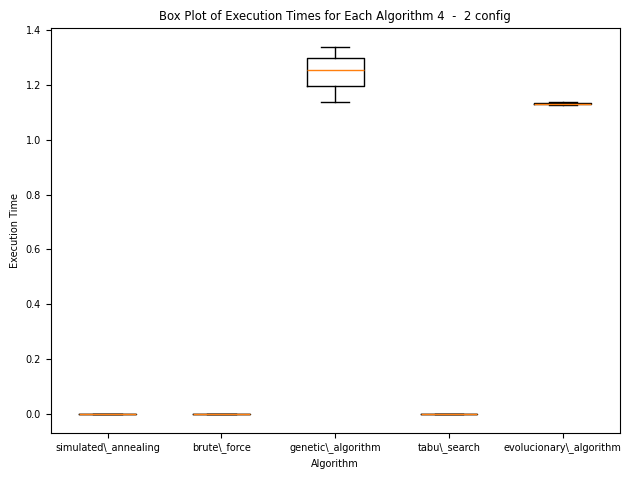

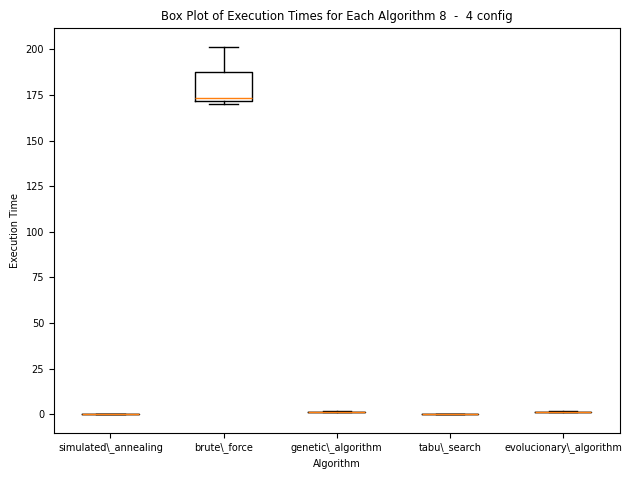

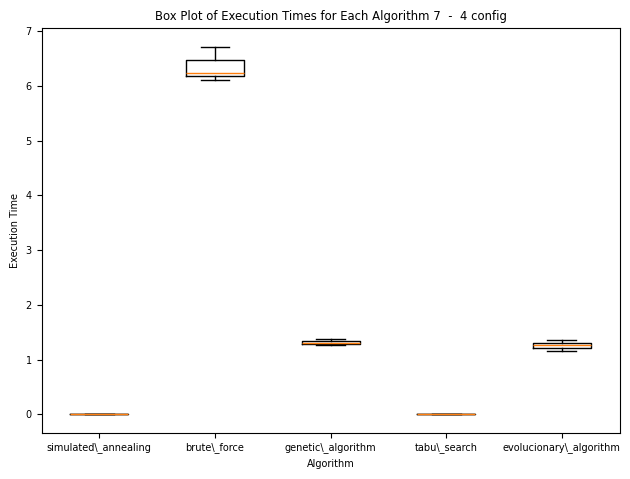

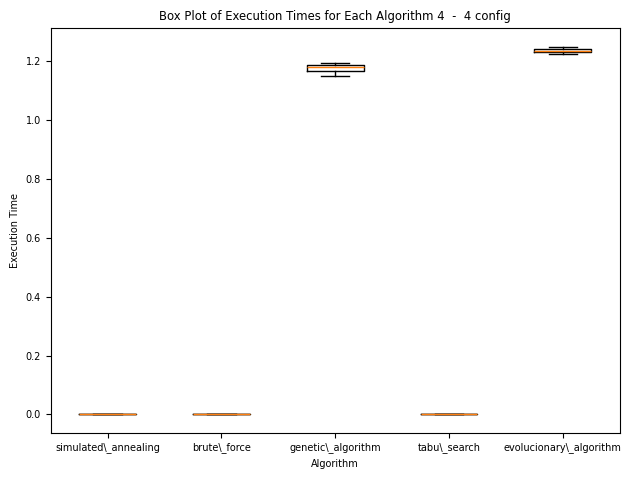

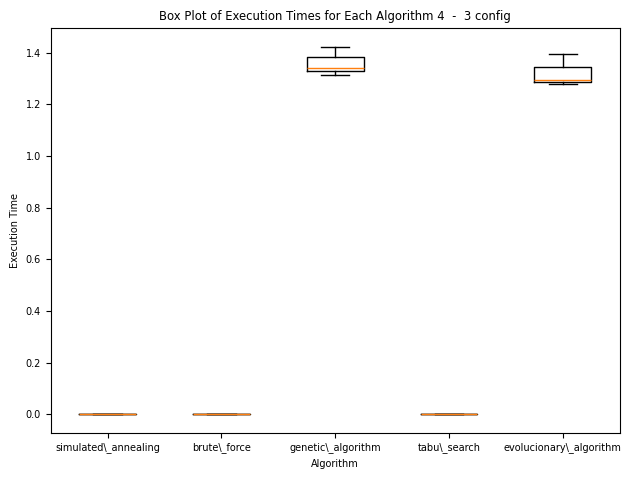

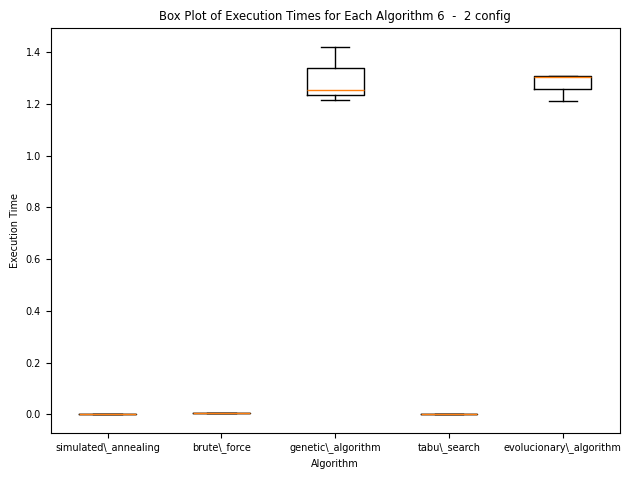

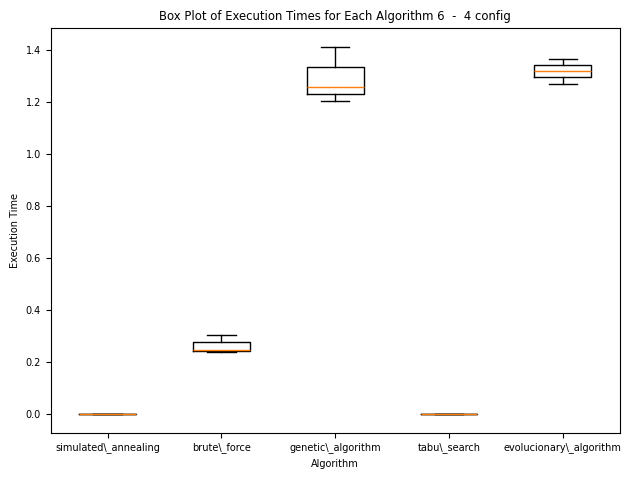

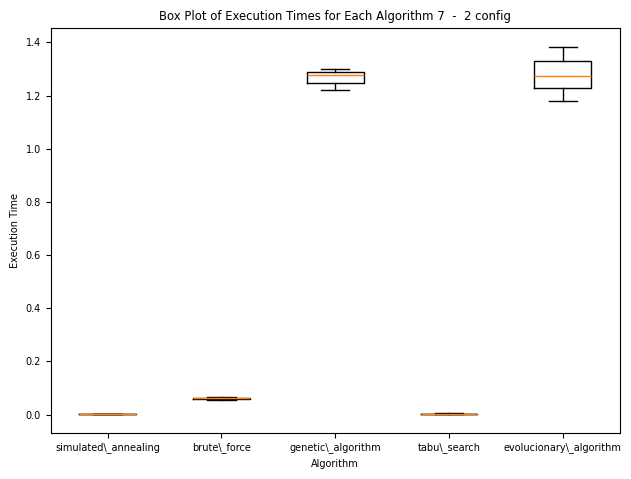

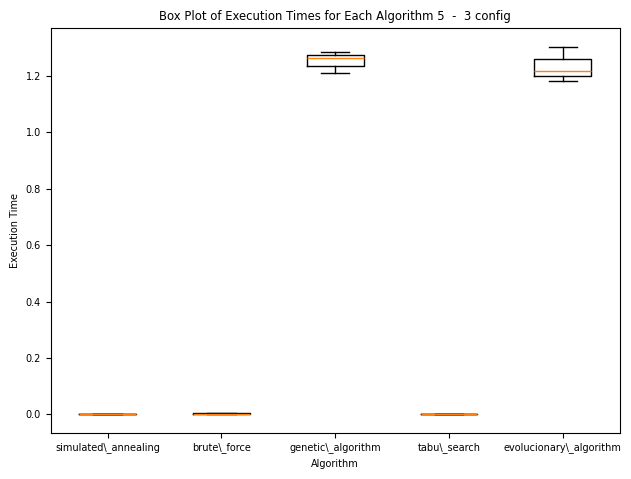

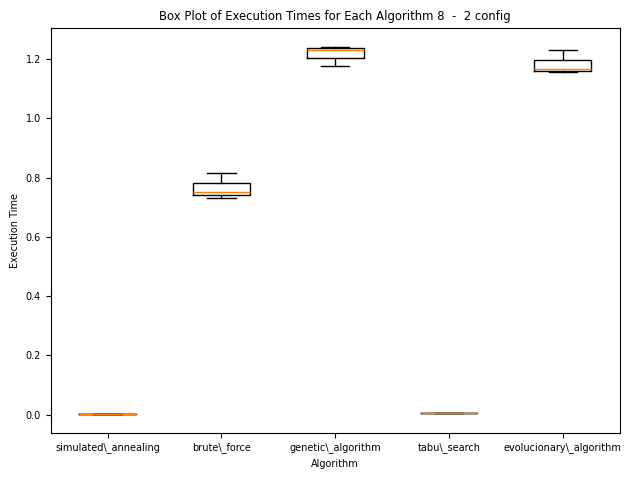

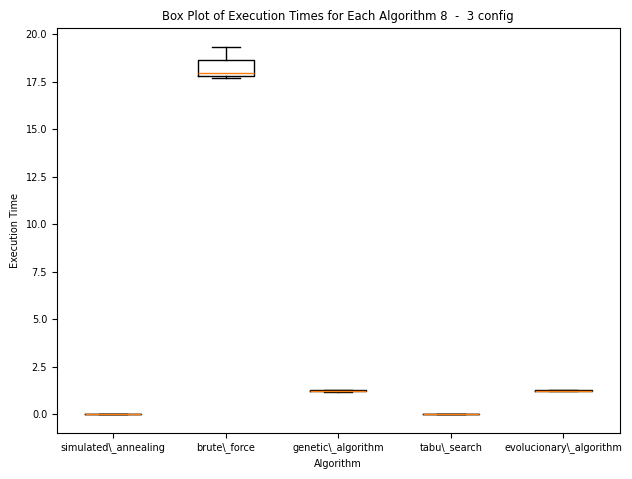

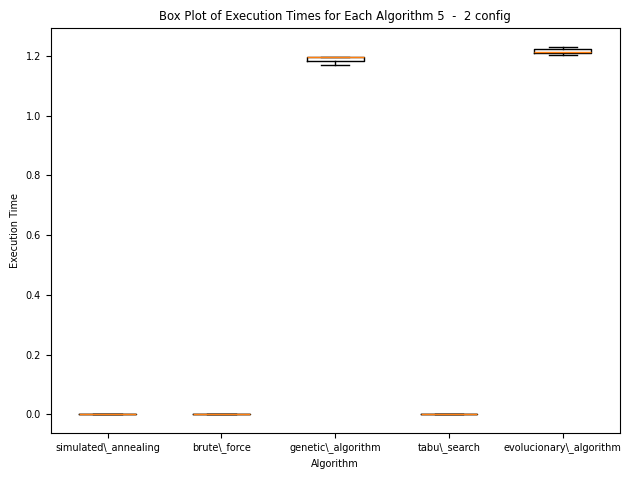

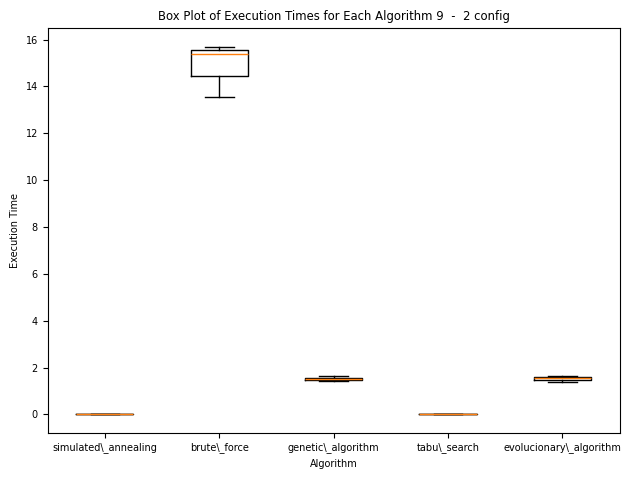

In [249]:
#Bloxplot
import matplotlib.pyplot as plt


config_data = {algorithm: [] for algorithm in set_configurations}
for row in data:
    config_data[row[1]].append((row[0], row[2], row[3]))  # Add a tuple of execution number and execution time

config_data_executions = {algorithm: {config: [] for config in set_configurations} for algorithm in set_algorithm}

algorithms = ["brute\_force", "genetic\_algorithm", "evolucionary\\_algorithm", "tabu\_search", "simulated\_annealing"]
for config in config_data:
    algorithm_data = {algorithm: [] for algorithm in algorithms}

    for row in config_data[config]:
        algorithm_data[row[0]].append( row[2])  # Add a tuple of execution number and execution time
    ext_time= []
    for alg in set_algorithm:
        ext_time.append(algorithm_data[alg])
    for alg in algorithm_data:
        config_data_executions[alg][config].append(algorithm_data[alg])

    plt.rcParams.update({'font.size': 7})
    plt.boxplot(ext_time, labels=set_algorithm)
    plt.ylabel('Execution Time')
    plt.xlabel('Algorithm')
    plt.title('Box Plot of Execution Times for Each Algorithm ' +config + ' config' )
    plt.tight_layout()

    plt.show()



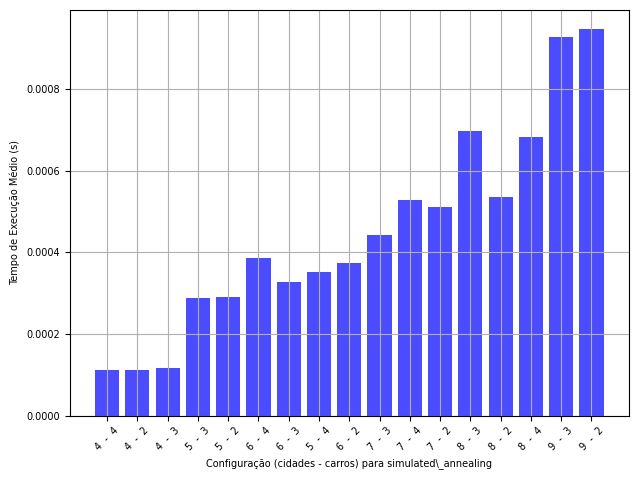

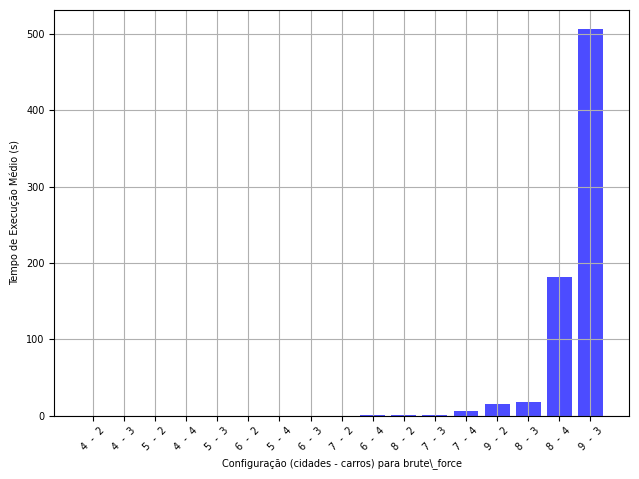

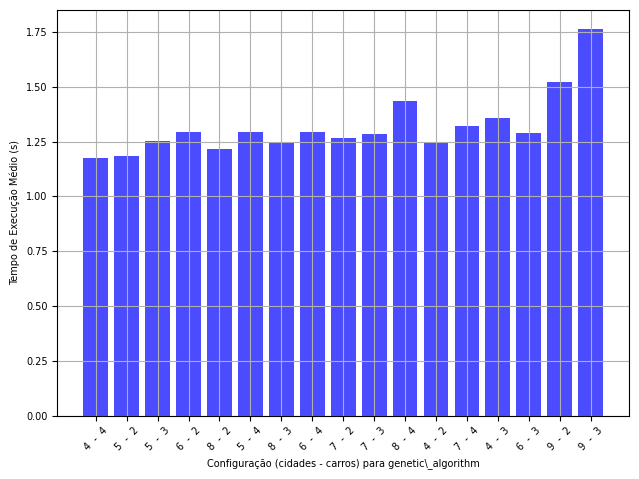

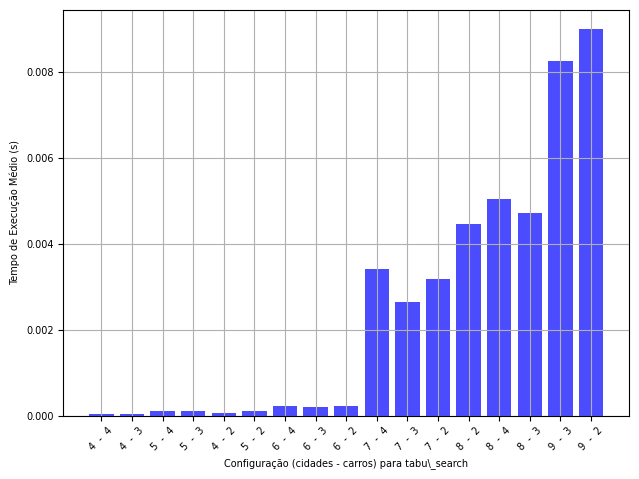

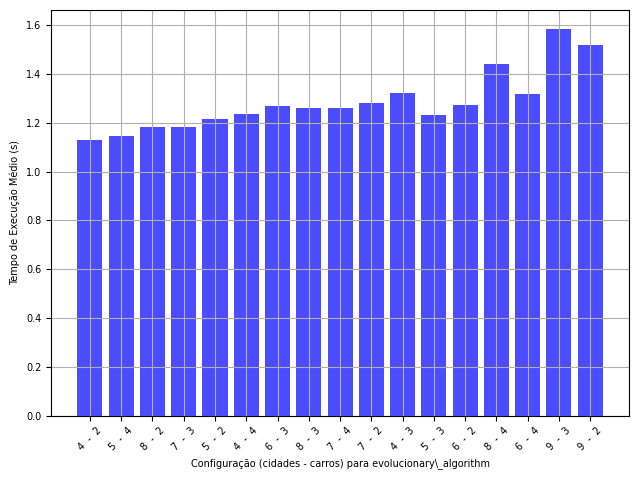

In [250]:
import matplotlib.pyplot as plt
import numpy as np

for alg in config_data_executions:
    data = config_data_executions[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)
    average_data = {}

    for config, times in data.items():
        avg_time = np.mean(times)
        average_data[config] = avg_time

    fig, ax = plt.subplots()

    configs, avg_times = zip(*average_data.items())
    x_labels = [config for config in configs]

    ax.bar(x_labels, avg_times, color='blue', alpha=0.7)

    ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
    ax.set_ylabel('Tempo de Execução Médio (s)')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


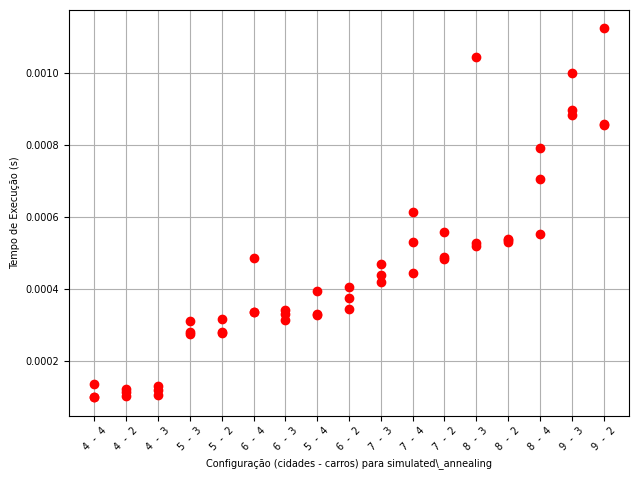

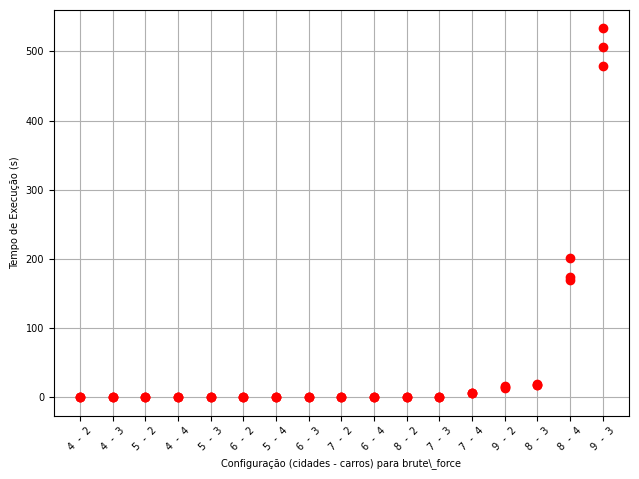

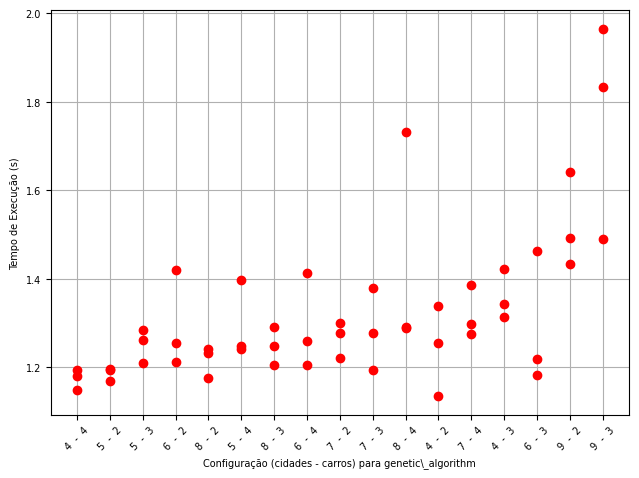

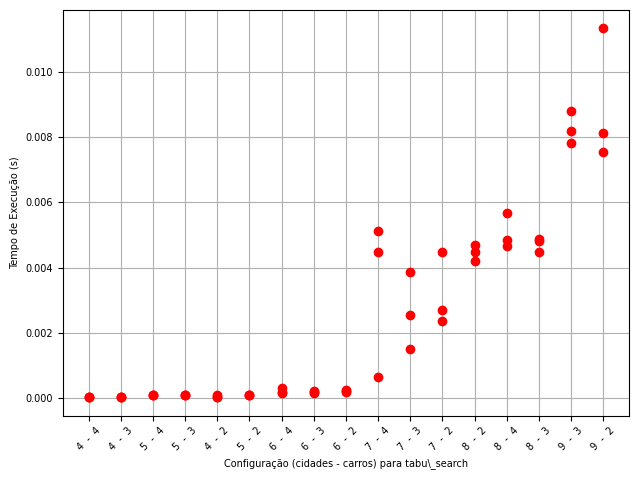

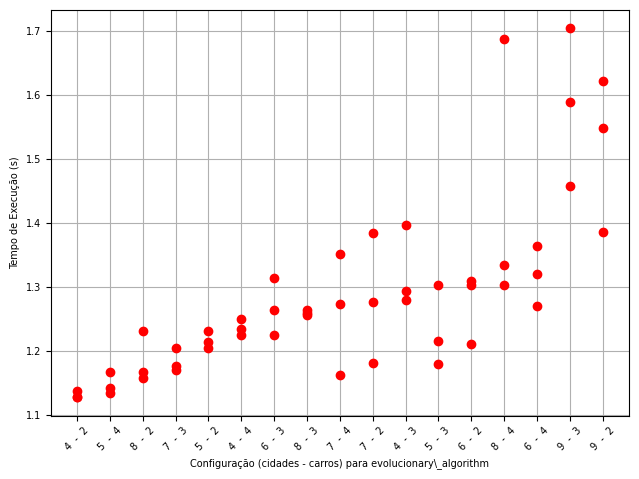

In [251]:
import matplotlib.pyplot as plt

for alg in config_data_executions:
    data = config_data_executions[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)
    fig, ax = plt.subplots()

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=config, color = "red")

    ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
    ax.set_ylabel('Tempo de Execução (s)')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


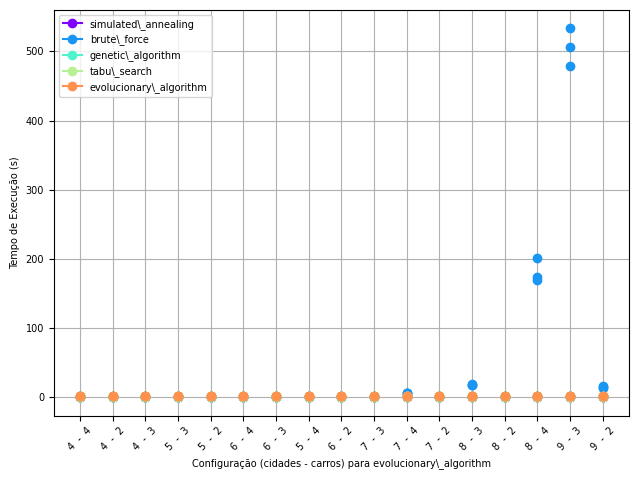

In [263]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

color = iter(cm.rainbow(np.linspace(0, 20, 100)))
fig, ax = plt.subplots()

for alg in config_data_executions:
    data = config_data_executions[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)

    colorNow = next(color)

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=alg, color = colorNow)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
ax.set_ylabel('Tempo de Execução (s)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


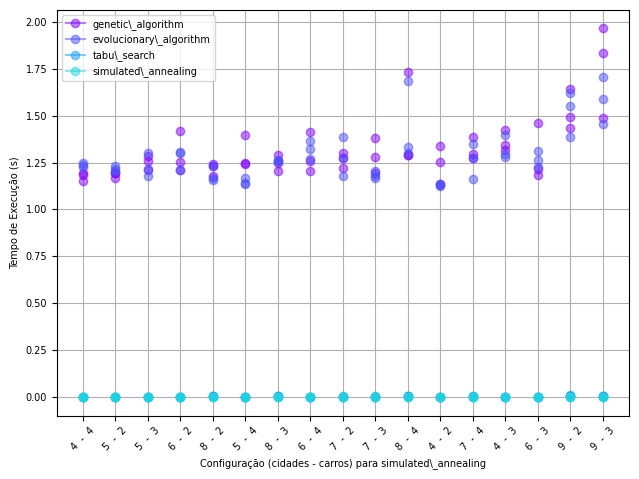

In [261]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
algorithms = [ "genetic\_algorithm", "evolucionary\\_algorithm", "tabu\_search", "simulated\_annealing"]
config_data_executions_now = {key: config_data_executions[key] for key in algorithms}

color = iter(cm.rainbow(np.linspace(0, 2, 20)))
fig, ax = plt.subplots()
for alg in config_data_executions_now:
    data = config_data_executions_now[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)

    colorNow = next(color)

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=alg, color = colorNow,  alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
ax.set_ylabel('Tempo de Execução (s)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


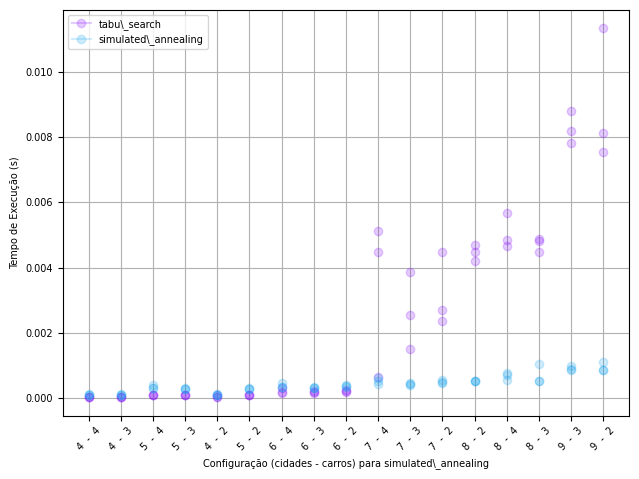

In [254]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
algorithms = ["tabu\_search", "simulated\_annealing"]
config_data_executions_now = {key: config_data_executions[key] for key in algorithms}

color = iter(cm.rainbow(np.linspace(0, 2, 10)))
fig, ax = plt.subplots()
for alg in config_data_executions_now:
    data = config_data_executions_now[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)

    colorNow = next(color)

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=alg, color = colorNow,alpha=0.2)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
ax.set_ylabel('Tempo de Execução (s)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


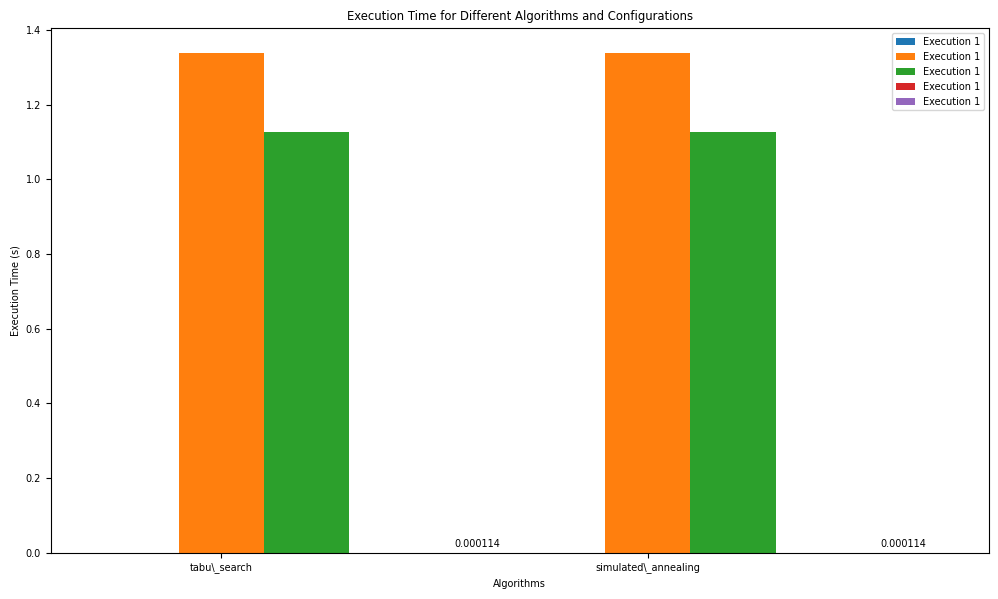

In [255]:

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = [i for i in range(len(algorithms))]


# algorithms = ["brute\_force", "genetic\_algorithm", "evolucionary\\_algorithm", "tabu\_search", "simulated\_annealing"]
# for config in config_data:
#     algorithm_data = {algorithm: [] for algorithm in algorithms}

#     for row in config_data[config]:
#         algorithm_data[row[0]].append( row[2])  # Add a tuple of execution number and execution time
#     ext_time= []
#     for alg in set_algorithm:
#         ext_time.append(algorithm_data[alg])
    
#     plt.rcParams.update({'font.size': 7})
#     plt.boxplot(ext_time, labels=set_algorithm)
#     plt.ylabel('Execution Time')
#     plt.xlabel('Algorithm')
#     plt.title('Box Plot of Execution Times for Each Algorithm ' +config + ' config' )
#     plt.show()


for i, execution in enumerate(executions[:5]):
    bars = ax.bar(
        [pos + bar_width * i for pos in bar_positions],
        execution_times[i],
        width=bar_width,
        label=f'Execution {execution + 1}'
    )

# Adding labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Execution Time for Different Algorithms and Configurations')
ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(algorithms)
ax.legend()

# Adding data labels
for bars in bars:
    height = bars.get_height()
    ax.annotate(f'{height:.6f}', xy=(bars.get_x() + bars.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [256]:
import matplotlib.pyplot as plt

# Plotting execution times
for algorithm, values in algorithm_data.items():
    x_values = [x[1] + 1 for x in values]  # Execution numbers
    y_values = [x[2] for x in values]  # Execution times
    plt.plot(x_values, y_values, label=algorithm)
plt.xlabel('Execution')
plt.ylabel('Execution Time')
plt.legend()
plt.show()



# Plotting execution times
for i, algorithm in enumerate(algorithms):
    plt.plot(executions, [execution_times[j][i] for j in executions], label=algorithm)
plt.xlabel('Execution')
plt.ylabel('Execution Time')
plt.legend()
plt.show()

# Plotting best distances
for i, algorithm in enumerate(algorithms):
    plt.plot(executions, [best_distances[j][i] for j in executions], label=algorithm)
plt.xlabel('Execution')
plt.ylabel('Best Distance')
plt.legend()
plt.show()


TypeError: 'float' object is not subscriptable

In [257]:
print(data[:][:][:][3])
i = data[:][:][3]
print(i[3])

TypeError: unhashable type: 'slice'

In [ ]:
# Select execution times and best distances for a specific algorithm (e.g., brute_force)
brute_force_times = [times[0] for times in data[:][3]]
brute_force_distances = [distances[0] for distances in best_distances]

# Create a scatter plot
plt.scatter(brute_force_times, brute_force_distances)
plt.xlabel('Execution Time')
plt.ylabel('Best Distance')
plt.title('Scatter Plot of Execution Times vs Best Distances for Brute Force Algorithm')
plt.show()


TypeError: 'int' object is not subscriptable